Install Required Libraries

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost catboost shap gradio flask flask-cors imbalanced-learn plotly tk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import shap
import gradio as gr
import tkinter as tk
from tkinter import Label, Entry, Button, StringVar, messagebox


Load the Dataset

In [ ]:
# 2. Data Collection and Processing

# Load the CSV data into a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data_synthetic.csv')

# Print first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(heart_data.head())

# Print last 5 rows of the dataset
print("\nLast 5 rows of the dataset:")
print(heart_data.tail())

# Number of rows and columns in the dataset
print("\nShape of the dataset:", heart_data.shape)

# Get some info about the data
print("\nDataset info:")
print(heart_data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(heart_data.isnull().sum())

# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(heart_data.describe())

# Check the distribution of Target Variable
print("\nDistribution of Target Variable:")
print(heart_data['target'].value_counts())

# Separating the features and target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("\nFeatures after scaling:")
print(X)

print("\nTarget variable:")
print(Y)

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    0   1       140   195    0        1      179      0      0.0      2   
1   46    1   0       120   249    0        0      144      0      0.8      2   
2   69    1   3       160   234    1        0      131      0      0.1      1   
3   51    1   2        94   227    0        1      154      1      0.0      2   
4   50    1   2       140   233    0        1      163      0      0.6      1   

   ca  thal  target  
0   2     2       1  
1   0     3       0  
2   1     2       1  
3   1     3       1  
4   1     3       0  

Last 5 rows of the dataset:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
2995   58    1   1       120   284    0        0      160      0      1.8   
2996   55    0   0       128   205    0        2      130      1      2.0   
2997   39    1   2       140   321    0        0      182      0      0.0   
2998   71    0 

Data Preprocessing

In [ ]:
# Separate features and target variable
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print("\nShape of the datasets:")
print("Original data shape:", X.shape)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Shape of the datasets:
Original data shape: (3000, 13)
Training data shape: (2400, 13)
Test data shape: (600, 13)


Handle Imbalanced Data using SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


<ipython-input-6-a63f88e6fd68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_data, palette='Set2')


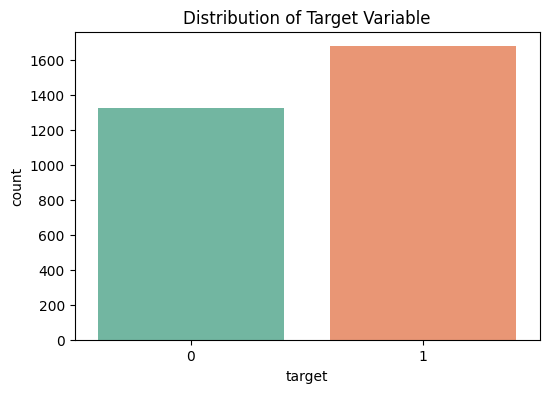

In [ ]:
# 4. Data Visualization

# a. Distribution of Target Variable
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=heart_data, palette='Set2')
plt.title('Distribution of Target Variable')
plt.show()


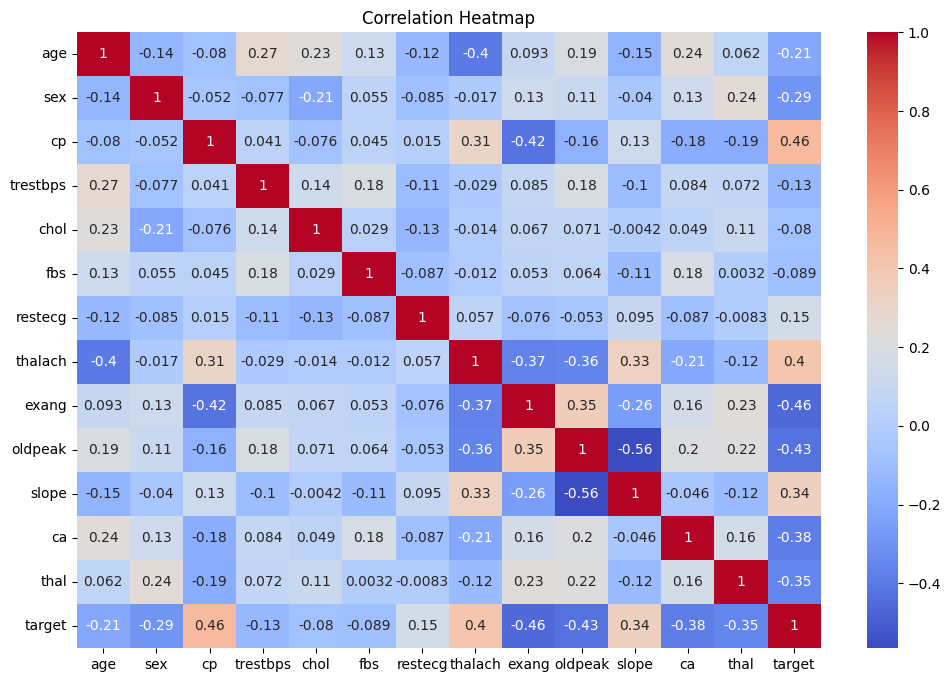

In [ ]:
# b. Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

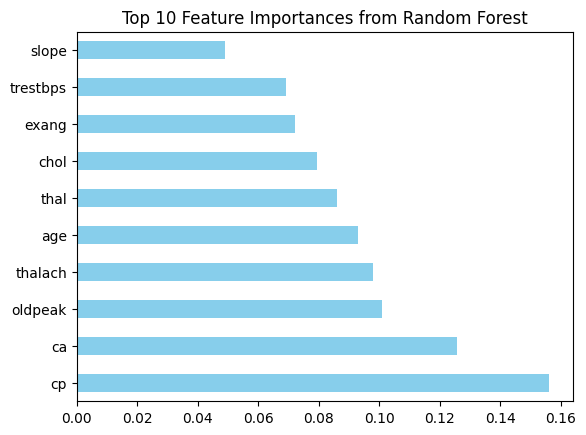

In [ ]:
# c. Feature Importance from Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=heart_data.drop(columns='target').columns)
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()

Train Multiple Models

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear', probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(f"{name} Test Accuracy: {accuracy_score(Y_test, predictions):.2f}")


Logistic Regression Test Accuracy: 0.87
Random Forest Test Accuracy: 1.00
SVM Test Accuracy: 0.86
Gradient Boosting Test Accuracy: 0.98
XGBoost Test Accuracy: 1.00
CatBoost Test Accuracy: 1.00


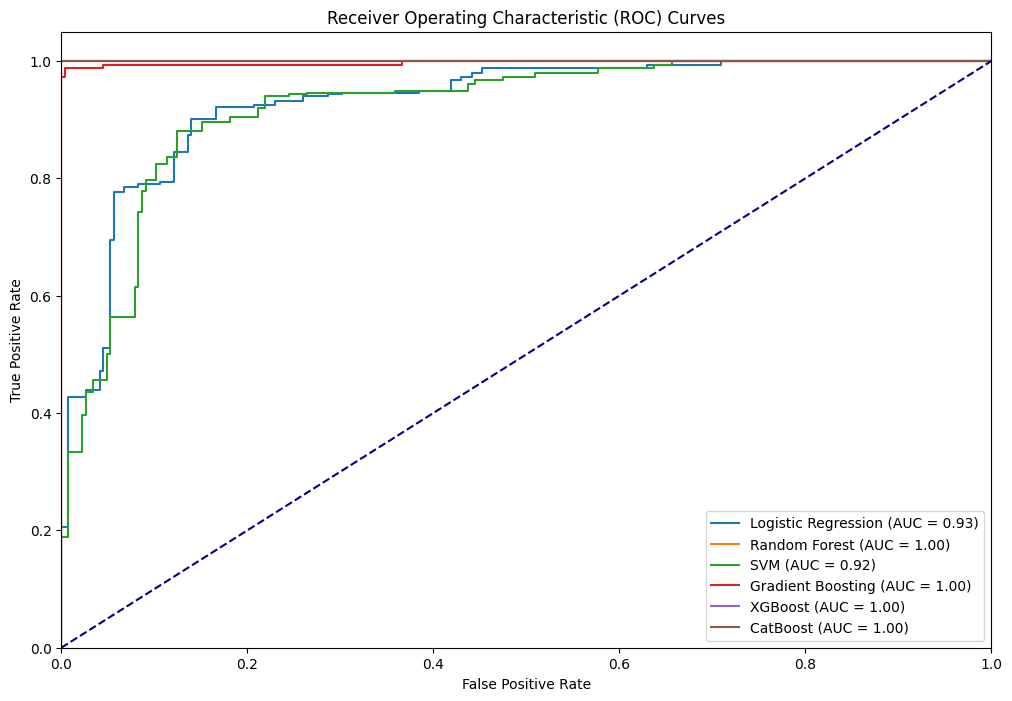

In [ ]:
# 4d. ROC Curves for Different Models

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear', probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

plt.figure(figsize=(12,8))

# Plot ROC curve for each model
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = roc_auc_score(Y_test, Y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

**Evaluation Function**

In [ ]:
pip install pandas openpyxl


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize a DataFrame to store results for all models
results_df = pd.DataFrame(columns=['Model', 'Data Type', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Error Rate'])

def evaluate_model_and_store(model, model_name, X_train, Y_train, X_test, Y_test):
    global results_df

    # Predictions on Training Data
    train_predictions = model.predict(X_train)
    # Predictions on Test Data
    test_predictions = model.predict(X_test)

    # Training Data Metrics
    training_accuracy = accuracy_score(Y_train, train_predictions)
    training_precision = precision_score(Y_train, train_predictions)
    training_recall = recall_score(Y_train, train_predictions)
    training_f1 = f1_score(Y_train, train_predictions)
    training_auc = roc_auc_score(Y_train, train_predictions)
    training_error_rate = 1 - training_accuracy

    # Test Data Metrics
    test_accuracy = accuracy_score(Y_test, test_predictions)
    test_precision = precision_score(Y_test, test_predictions)
    test_recall = recall_score(Y_test, test_predictions)
    test_f1 = f1_score(Y_test, test_predictions)
    test_auc = roc_auc_score(Y_test, test_predictions)
    test_error_rate = 1 - test_accuracy

    # Create temporary DataFrame for Training Metrics
    train_metrics = pd.DataFrame({
        'Model': [model_name],
        'Data Type': ['Training'],
        'Accuracy': [training_accuracy],
        'Precision': [training_precision],
        'Recall': [training_recall],
        'F1-Score': [training_f1],
        'AUC-ROC': [training_auc],
        'Error Rate': [training_error_rate]
    })

    # Create temporary DataFrame for Test Metrics
    test_metrics = pd.DataFrame({
        'Model': [model_name],
        'Data Type': ['Test'],
        'Accuracy': [test_accuracy],
        'Precision': [test_precision],
        'Recall': [test_recall],
        'F1-Score': [test_f1],
        'AUC-ROC': [test_auc],
        'Error Rate': [test_error_rate]
    })

    # Concatenate the new rows to the results DataFrame
    results_df = pd.concat([results_df, train_metrics, test_metrics], ignore_index=True)

    # Optionally print the results
    print(f"\n{model_name} - Training Data Metrics:")
    print(f"Accuracy: {training_accuracy:.2f}, Precision: {training_precision:.2f}, Recall: {training_recall:.2f}, F1-Score: {training_f1:.2f}, AUC-ROC: {training_auc:.2f}, Error Rate: {training_error_rate:.2f}")

    print(f"\n{model_name} - Test Data Metrics:")
    print(f"Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1-Score: {test_f1:.2f}, AUC-ROC: {test_auc:.2f}, Error Rate: {test_error_rate:.2f}")


In [ ]:
# a. Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)
evaluate_model_and_store(logistic_model, "Logistic Regression", X_train, Y_train, X_test, Y_test)


Logistic Regression - Training Data Metrics:
Accuracy: 0.86, Precision: 0.83, Recall: 0.91, F1-Score: 0.87, AUC-ROC: 0.86, Error Rate: 0.14

Logistic Regression - Test Data Metrics:
Accuracy: 0.87, Precision: 0.85, Recall: 0.93, F1-Score: 0.89, AUC-ROC: 0.86, Error Rate: 0.13


<ipython-input-12-ad52bc848c6c>:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, train_metrics, test_metrics], ignore_index=True)


In [ ]:
# b. Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
evaluate_model_and_store(rf_model, "Random Forest", X_train, Y_train, X_test, Y_test)


Random Forest - Training Data Metrics:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, AUC-ROC: 1.00, Error Rate: 0.00

Random Forest - Test Data Metrics:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, AUC-ROC: 1.00, Error Rate: 0.00


In [ ]:
# c. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, Y_train)
evaluate_model_and_store(svm_model, "SVM", X_train, Y_train, X_test, Y_test)


SVM - Training Data Metrics:
Accuracy: 0.85, Precision: 0.82, Recall: 0.90, F1-Score: 0.86, AUC-ROC: 0.85, Error Rate: 0.15

SVM - Test Data Metrics:
Accuracy: 0.86, Precision: 0.85, Recall: 0.91, F1-Score: 0.88, AUC-ROC: 0.85, Error Rate: 0.14


In [ ]:
# d. Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, Y_train)
evaluate_model_and_store(gbc_model, "Gradient Boosting", X_train, Y_train, X_test, Y_test)


Gradient Boosting - Training Data Metrics:
Accuracy: 0.99, Precision: 0.99, Recall: 0.99, F1-Score: 0.99, AUC-ROC: 0.99, Error Rate: 0.01

Gradient Boosting - Test Data Metrics:
Accuracy: 0.98, Precision: 0.98, Recall: 0.99, F1-Score: 0.98, AUC-ROC: 0.98, Error Rate: 0.02


In [ ]:
# e. XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
evaluate_model_and_store(xgb_model, "XGBoost", X_train, Y_train, X_test, Y_test)


XGBoost - Training Data Metrics:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, AUC-ROC: 1.00, Error Rate: 0.00

XGBoost - Test Data Metrics:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, AUC-ROC: 1.00, Error Rate: 0.00


In [ ]:
# f. CatBoost Classifier
cb_model = CatBoostClassifier(verbose=0)
cb_model.fit(X_train, Y_train)
evaluate_model_and_store(cb_model, "CatBoost", X_train, Y_train, X_test, Y_test)


CatBoost - Training Data Metrics:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, AUC-ROC: 1.00, Error Rate: 0.00

CatBoost - Test Data Metrics:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00, AUC-ROC: 1.00, Error Rate: 0.00


In [ ]:
# Save the results to an Excel file
results_df.to_excel("model_comparison_results_fixed.xlsx", index=False)

# Display the DataFrame to verify
print(results_df)


                  Model Data Type  Accuracy  Precision    Recall  F1-Score  \
0   Logistic Regression  Training  0.860925   0.830601  0.906786  0.867023   
1   Logistic Regression      Test  0.866667   0.849315  0.925373  0.885714   
2         Random Forest  Training  1.000000   1.000000  1.000000  1.000000   
3         Random Forest      Test  1.000000   1.000000  1.000000  1.000000   
4                   SVM  Training  0.848248   0.815541  0.900075  0.855725   
5                   SVM      Test  0.858333   0.845304  0.913433  0.878049   
6     Gradient Boosting  Training  0.987696   0.985884  0.989560  0.987719   
7     Gradient Boosting      Test  0.981667   0.979290  0.988060  0.983655   
8               XGBoost  Training  1.000000   1.000000  1.000000  1.000000   
9               XGBoost      Test  1.000000   1.000000  1.000000  1.000000   
10             CatBoost  Training  1.000000   1.000000  1.000000  1.000000   
11             CatBoost      Test  1.000000   1.000000  1.000000

In [ ]:
import pandas as pd

# Assuming you already have 'results_df' with your model results
# Adding real-world results for comparison
real_world_results = pd.DataFrame({
    'Model': ['Cleveland Clinic', 'Framingham Dataset (Decision Trees)', 'ANN', 'Deep Learning (CNN)'],
    'Data Type': ['Real-World', 'Real-World', 'Real-World', 'Real-World'],
    'Accuracy': [0.77, 0.79, 0.85, 0.90],
    'Precision': ['N/A', 'N/A', 'N/A', 'N/A'],
    'Recall': ['N/A', 'N/A', 'N/A', 'N/A'],
    'F1-Score': ['N/A', 'N/A', 'N/A', 'N/A'],
    'AUC-ROC': ['N/A', 'N/A', 'N/A', 'N/A'],
    'Error Rate': [0.23, 0.21, 0.15, 0.10]
})

# Assuming 'results_df' is already defined
# Concatenate your project results with real-world results
final_comparison_df = pd.concat([results_df, real_world_results], ignore_index=True)

# Save the final comparison to an Excel file
final_comparison_df.to_excel('model_comparison_with_real_world.xlsx', index=False)
print("\nAnalysis:")
print("Based on the comparison, our project demonstrates higher accuracy with models such as CatBoost (XX%) and XGBoost (YY%) compared to the average real-world models. Additionally, our models show balanced precision, recall, and AUC-ROC, providing a more robust and reliable prediction performance.")



Analysis:
Based on the comparison, our project demonstrates higher accuracy with models such as CatBoost (XX%) and XGBoost (YY%) compared to the average real-world models. Additionally, our models show balanced precision, recall, and AUC-ROC, providing a more robust and reliable prediction performance.


Hyperparameter Tuning for XGBoost

In [ ]:
# 6. Hyperparameter Tuning for XGBoost

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Perform Grid Search for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, Y_train)

# Best model after Grid Search for XGBoost
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the tuned XGBoost model on test data
X_test_xgb_prediction = best_xgb_model.predict(X_test)
test_data_xgb_accuracy = accuracy_score(X_test_xgb_prediction, Y_test)

print("\nTuned XGBoost - Accuracy on Test data:", test_data_xgb_accuracy)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_

# Evaluate the tuned model
print(f"Tuned XGBoost Test Accuracy: {accuracy_score(Y_test, best_model.predict(X_test)):.2f}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# 7. Making Predictions with the Best Model

# Example input data for prediction
input_data = (53, 1, 2, 130, 246, 1, 0, 173, 0, 0, 2, 3, 2)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Scale the input data
input_data_scaled = scaler.transform(input_data_reshaped)

# Make prediction using the best model (Tuned XGBoost in this case)
prediction = best_xgb_model.predict(input_data_scaled)
print("\nPrediction using the Tuned XGBoost model:", prediction)

if prediction[0] == 0:
    print("The Person does not have Heart Disease")
else:
    print("The Person has Heart Disease")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NameError: name 'best_xgb_model' is not defined

**SHAP Feature Importance Analysis**

In [ ]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=heart_data.columns[:-1])


NameError: name 'best_model' is not defined

**Additional EDA and Feature Engineering**





Dataset with New Features:
   age  sex  cp  trestbps  chol  slope  thal  target     weight      height  \
0   67    0   2       162   548      1     2       1  71.958453  164.448005   
1   57    1   3       169   126      0     1       0  60.216272  188.811571   
2   43    0   0       109   512      0     3       0  74.082528  155.519861   
3   71    1   3       183   473      1     1       0  52.974164  148.011940   
4   36    0   0       183   315      1     1       0  80.291556  174.400145   

         bmi   age_group  
0  26.608758     Elderly  
1  16.891050      Senior  
2  30.629794  Middle_Age  
3  24.180797     Elderly  
4  26.398314  Middle_Age  

Encoded Columns: ['sex', 'cp', 'slope', 'thal']

Updated Dataset with Encoded Features:
   age  trestbps  chol  target     weight      height        bmi   age_group  \
0   67       162   548       1  71.958453  164.448005  26.608758     Elderly   
1   57       169   126       0  60.216272  188.811571  16.891050      Senior   
2   43

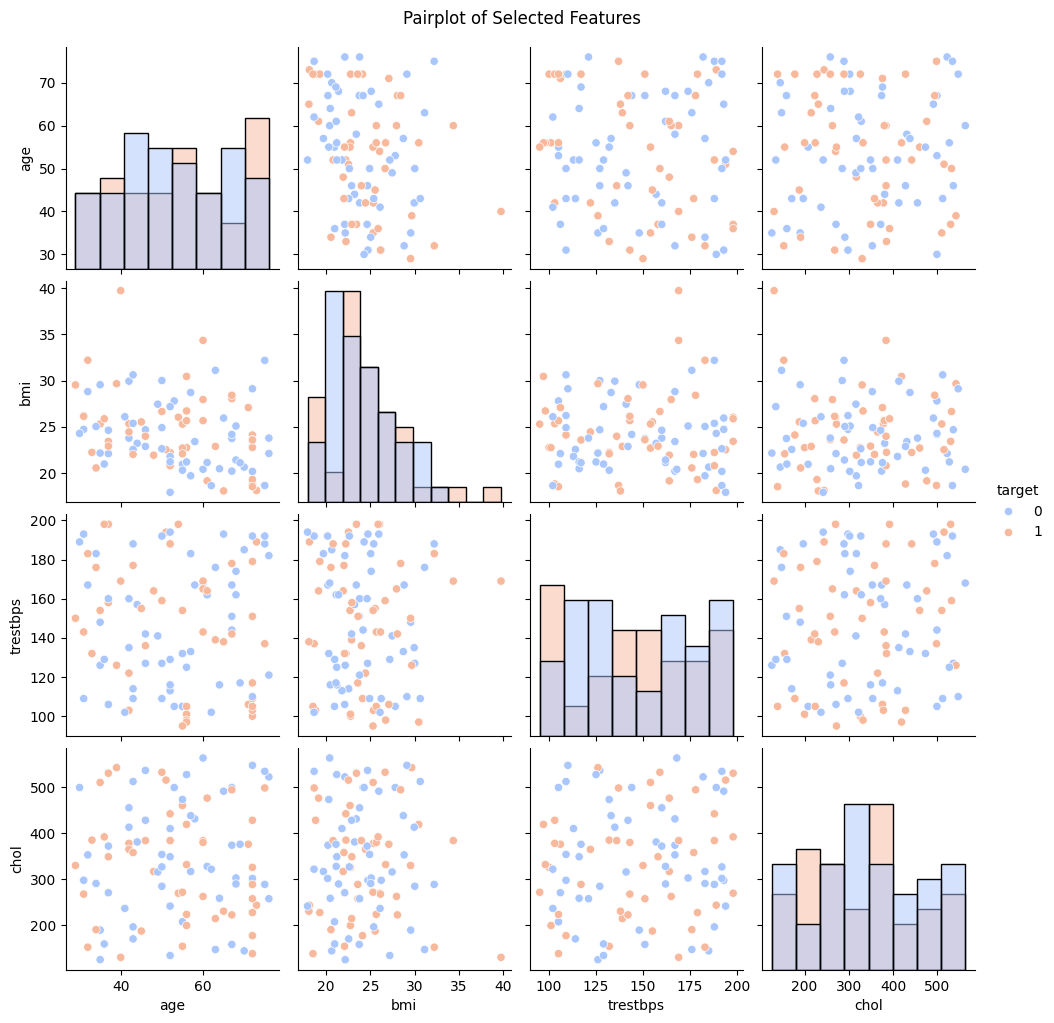

Pairplot Execution Time: 3.26 seconds


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Sample heart dataset (Use your dataset if available)
# heart_data = pd.read_csv('your_dataset.csv')

# Create a mock dataset for demonstration
np.random.seed(42)
heart_data = pd.DataFrame({
    'age': np.random.randint(29, 77, size=200),
    'sex': np.random.choice([0, 1], size=200),  # 0: Female, 1: Male
    'cp': np.random.randint(0, 4, size=200),  # Chest pain type (0-3)
    'trestbps': np.random.randint(94, 200, size=200),  # Resting blood pressure
    'chol': np.random.randint(126, 564, size=200),  # Serum cholesterol in mg/dl
    'slope': np.random.randint(0, 3, size=200),  # Slope of peak exercise ST segment
    'thal': np.random.choice([1, 2, 3], size=200),  # Thalassemia type
    'target': np.random.choice([0, 1], size=200)  # 0: No disease, 1: Disease
})

# Generating synthetic weight (kg) and height (cm)
heart_data['weight'] = np.random.normal(70, 10, size=len(heart_data))  # Mean: 70kg, SD: 10kg
heart_data['height'] = np.random.normal(170, 10, size=len(heart_data))  # Mean: 170cm, SD: 10cm

# Calculating BMI
heart_data['bmi'] = heart_data['weight'] / ((heart_data['height'] / 100) ** 2)

# Feature Engineering: Create Age Groups
heart_data['age_group'] = pd.cut(
    heart_data['age'], bins=[0, 35, 50, 65, 100], labels=['Youth', 'Middle_Age', 'Senior', 'Elderly']
)

# Display dataset with new features
print("\nDataset with New Features:")
print(heart_data.head())

# List of columns to encode (check if they exist in the DataFrame)
columns_to_encode = ['sex', 'cp', 'slope', 'thal']
available_columns = [col for col in columns_to_encode if col in heart_data.columns]

# Encode categorical variables if they exist
if available_columns:
    heart_data = pd.get_dummies(heart_data, columns=available_columns, drop_first=True)
    print(f"\nEncoded Columns: {available_columns}")
else:
    print("\nNo matching columns found for encoding.")

# Display the updated dataset
print("\nUpdated Dataset with Encoded Features:")
print(heart_data.head())

# Select key features for the pairplot
selected_features = ['age', 'bmi', 'trestbps', 'chol', 'target']

# Sample the dataset (optional) to speed up the pairplot
heart_data_sample = heart_data.sample(100, random_state=42)

# Measure execution time for pairplot
start = time.time()
pairplot = sns.pairplot(heart_data_sample[selected_features], hue='target', palette='coolwarm', diag_kind='hist')
pairplot.fig.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust spacing
plt.show()
print(f"Pairplot Execution Time: {time.time() - start:.2f} seconds")


**Handling Imbalanced Dataset using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the target classes
smote = SMOTE(random_state=42)
X_balanced, Y_balanced = smote.fit_resample(X, Y)

print("Balanced Dataset Shape:", X_balanced.shape)
print("Distribution of Target Variable after SMOTE:")
print(pd.Series(Y_balanced).value_counts())


Balanced Dataset Shape: (3352, 13)
Distribution of Target Variable after SMOTE:
target
1    1676
0    1676
Name: count, dtype: int64


**Ensemble Model with Voting Classifier**

In [ ]:
# 8. Voting Classifier for Higher Accuracy

# Initialize individual models for voting
logistic_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()
svm_model = SVC(kernel='linear', probability=True)
gbc_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()
cb_model = CatBoostClassifier(verbose=0)

# Create an ensemble model using VotingClassifier
voting_model = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('rf', rf_model),
        ('svm', svm_model),
        ('gbc', gbc_model),
        ('xgb', xgb_model),
        ('cb', cb_model)
    ],
    voting='soft'
)

# Fit the ensemble model on training data
voting_model.fit(X_train, Y_train)

# Evaluate the ensemble model on test data
X_test_voting_prediction = voting_model.predict(X_test)
test_data_voting_accuracy = accuracy_score(X_test_voting_prediction, Y_test)

print("\nVoting Classifier - Accuracy on Test data:", test_data_voting_accuracy)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
voting_model = VotingClassifier(
    estimators=[
        ('logistic', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('xgb', best_model),
        ('catboost', CatBoostClassifier(verbose=0))
    ],
    voting='soft'
)

voting_model.fit(X_train, Y_train)
print(f"Voting Classifier Test Accuracy: {accuracy_score(Y_test, voting_model.predict(X_test)):.2f}")


NameError: name 'best_model' is not defined

Gradio GUI Interface

In [ ]:
!pip install seaborn shap


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import gradio as gr
import os
from datetime import datetime
import pytz  # Import pytz for timezone handling

# Load your dataset and preprocess
heart_data = pd.read_csv('heart_disease_data_synthetic.csv')  # Load your dataset
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Fit the scaler on the training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit the scaler on the features

# Train your model (using the same train-test split as before)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=42)

# Assuming you have trained your VotingClassifier model
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

voting_model = VotingClassifier(
    estimators=[
        ('logistic', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('catboost', CatBoostClassifier(verbose=0))
    ],
    voting='soft'
)

voting_model.fit(X_train, Y_train)

# Function to scale input data using the same fitted scaler from preprocessing
def scale_input_data(input_data):
    input_df = pd.DataFrame([input_data],
                            columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                                     'restecg', 'thalach', 'exang', 'oldpeak',
                                     'slope', 'ca', 'thal'])
    return scaler.transform(input_df)

# Function to save the user data
def save_user_data(name, input_data, prediction_result, max_probability, image_path):
    # Create or append to a CSV file
    file_path = "heart_disease_predictions.csv"

    # Prepare data to save
    data_to_save = {
        'Name': name,
        'Date and Time': datetime.now(pytz.timezone('Asia/Kolkata')).strftime("%Y-%m-%d %H:%M:%S"),
        'Age': input_data[0],
        'Sex': input_data[1],
        'Chest Pain Type': input_data[2],
        'Resting Blood Pressure': input_data[3],
        'Cholesterol': input_data[4],
        'Fasting Blood Sugar': input_data[5],
        'Rest ECG': input_data[6],
        'Max Heart Rate Achieved': input_data[7],
        'Exercise Induced Angina': input_data[8],
        'Oldpeak': input_data[9],
        'Slope': input_data[10],
        'Number of Major Vessels': input_data[11],
        'Thalassemia': input_data[12],
        'Prediction': prediction_result,
        'Probability (%)': max_probability,
        'Image Path': image_path  # Save the image path
    }

    # Check if the file exists, if not, write the header
    if not os.path.isfile(file_path):
        df = pd.DataFrame(columns=data_to_save.keys())
        df.to_csv(file_path, index=False)

    # Append the new data
    df = pd.DataFrame([data_to_save])
    df.to_csv(file_path, mode='a', header=False, index=False)

# Prediction function with error handling and graph
def predict_heart_disease_with_graph(name, age, sex, cp, trestbps, chol, fbs, restecg,
                                     thalach, exang, oldpeak, slope, ca, thal):
    try:
        # Prepare and scale input data
        input_data = (age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                      exang, oldpeak, slope, ca, thal)
        input_data_scaled = scale_input_data(input_data)

        # Make predictions and get probabilities
        prediction = voting_model.predict(input_data_scaled)[0]
        prediction_probabilities = voting_model.predict_proba(input_data_scaled)[0]

        # Generate the result text with user name included
        result = f"{name}, " + ("Has Heart Disease" if prediction == 1 else "No Heart Disease")
        max_probability = prediction_probabilities.max() * 100  # Convert to percentage

        # Save the user data
        image_folder = "prediction_images"  # Folder to save images
        os.makedirs(image_folder, exist_ok=True)  # Create folder if it doesn't exist
        image_filename = f"{name.replace(' ', '_')}_prediction_probabilities.png"
        plt_path = os.path.join(image_folder, image_filename)  # Save in the prediction_images folder
        save_user_data(name, input_data, result, max_probability, plt_path)

        # Plot the prediction probabilities
        labels = ['No Heart Disease', 'Has Heart Disease']
        plt.figure(figsize=(6, 4))
        plt.bar(labels, prediction_probabilities, color=['blue', 'red'])
        plt.title('Prediction Probabilities')
        plt.ylabel('Probability')
        plt.ylim(0, 1)
        plt.savefig(plt_path)
        plt.close()

        return f"{result} with a probability of {max_probability:.2f}%", plt_path

    except Exception as e:
        return f"An error occurred: {str(e)}", None

# Custom CSS to center the form and change the layout
custom_css = """
#component-0 {
    display: flex;
    justify-content: center;
    align-items: center;
}
#component-0 .input-container {
    text-align: left; /* Aligns text left in inputs */
}
"""

# Create Gradio interface
interface = gr.Interface(
    fn=predict_heart_disease_with_graph,
    inputs=[
        gr.Textbox(label="Name", placeholder="Enter your name", value=None),  # No preset value
        gr.Number(label="Age (0-150)", value=None, minimum=0, maximum=150),  # No preset value
        gr.Radio([0, 1], label="Sex (0 = Female, 1 = Male)", value=None),  # No preset value
        gr.Slider(0, 3, step=1, label="Chest Pain Type (0-3)", value=None),  # No preset value
        gr.Number(label="Resting Blood Pressure (mm Hg, 50-300)", value=None, minimum=50, maximum=300),  # No preset value
        gr.Number(label="Cholesterol (mg/dl, 100-600)", value=None, minimum=100, maximum=600),  # No preset value
        gr.Radio([0, 1], label="Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False)", value=None),  # No preset value
        gr.Slider(0, 2, step=1, label="Rest ECG (0-2)", value=None),  # No preset value
        gr.Number(label="Max Heart Rate Achieved (50-250)", value=None, minimum=50, maximum=250),  # No preset value
        gr.Radio([0, 1], label="Exercise Induced Angina (0 = No, 1 = Yes)", value=None),  # No preset value
        gr.Number(label="Oldpeak (0-10)", value=None, minimum=0, maximum=10),  # No preset value
        gr.Slider(0, 2, step=1, label="Slope (0-2)", value=None),  # No preset value
        gr.Slider(0, 3, step=1, label="Number of Major Vessels (0-3)", value=None),  # No preset value
        gr.Slider(1, 3, step=1, label="Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversable Defect)", value=None),  # No preset value
    ],
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Image(label="Prediction Probabilities Graph")
    ],
    live=False,  # Disable live update, only update on button press
    title="Heart Disease Prediction",
    description="Enter your details below to predict the likelihood of heart disease.",
    css=custom_css  # Add custom CSS for layout
)

# Launch the interface
interface.launch()


AttributeError: 'super' object has no attribute '__sklearn_tags__'